In [1]:
import sysid
import sysid.subspace
import pickle
import pylab as pl
%matplotlib inline

In [2]:
data = pickle.load(open('BT_Control_10hz.pkl', 'r'))

In [3]:
data.keys()

['fs', 'F', 'M', 't', 'ch6', 'ch7', 'tf']

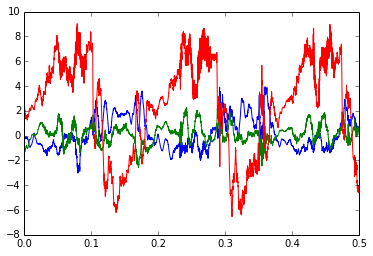

In [4]:
pl.plot(data['t'][0:10000], data['F'][0:10000]);

In [5]:
dt = pl.mean(pl.diff(data['t']))

In [6]:
data['t']/(data['t'][-1])

array([  0.00000000e+00,   1.00001000e-05,   2.00002000e-05, ...,
         9.99980000e-01,   9.99990000e-01,   1.00000000e+00])

In [7]:
def fft_analysis(t, y, n):

    pwr = pl.absolute(pl.fft(y))[0:n]
    freq = pl.arange(0,n)/t[-1]

    pl.plot(freq, pwr)
    pl.xlabel('freq, Hz')
    pl.ylabel('power')
    max_freq = freq[pl.argmax(pwr)]
    print('dominant freq {:f} Hz'.format(max_freq))
    return max_freq

In [8]:
# test fft
#t = pl.linspace(0,10, 100)
#y = pl.sin(2*pl.pi*t) + 2*pl.sin(2*pl.pi*2*t) + pl.sin(2*pl.pi*3*t)
#fft_analysis(t,y,50)

dominant freq 5.400000 Hz


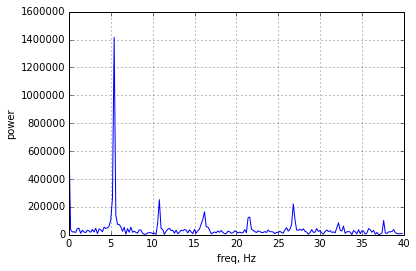

In [9]:
max_freq_pitch = fft_analysis(data['t'], data['M'][:,1], 200)
pl.grid()

In [10]:
data['t'][0:-1:10000]

array([ 0.      ,  0.500005,  1.00001 ,  1.500015,  2.00002 ,  2.500025,
        3.00003 ,  3.500035,  4.00004 ,  4.500045])

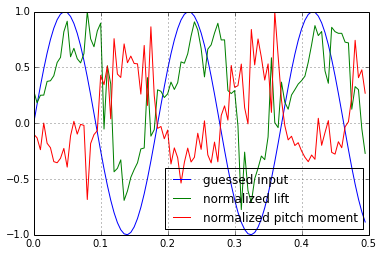

In [11]:
n = 10000
skip = 100
t = data['t'][:n:skip]
y = pl.hstack([data['F'][:n:skip,:], data['M'][:n:skip,:]])
u = pl.matrix(pl.sin(2*pl.pi*max_freq_pitch*t)).T
pl.plot(t, u, label='guessed input')
pl.plot(t, y[:,2]/y[:,2].max(), label='normalized lift')
pl.plot(t, y[:,4]/y[:,4].max(), label='normalized pitch moment')

pl.grid()
pl.legend(loc='best');

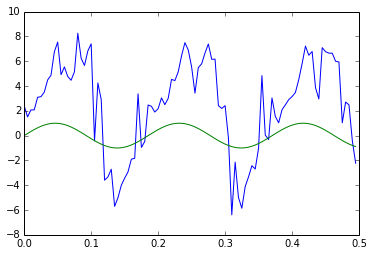

In [12]:
pl.plot(t, y[:,2])
pl.plot(t, u)

In [13]:
sys_id = sysid.subspace.subspace_det_algo1(
    y[:,2].T, u.T, f=3, p=3, s_tol=0.1,
    dt=pl.mean(pl.diff(t)))
sys_id

{'A': matrix([[ 0.50566123, -0.02997073],
        [ 1.33655248, -0.19621799]]), 'C': matrix([[-5.80065795,  0.44916726]]), 'B': matrix([[ 0.16604591],
        [ 0.55264691]]), 'D': matrix([[-1.59140567]]), 'Q': matrix([[ 0.,  0.],
        [ 0.,  0.]]), 'R': matrix([[ 0.]]), 'dt': 0.0050000500005000052}

In [14]:
sys_id_data = sys_id.simulate(f_u=lambda t, x, i: u[i],
                              x0=pl.zeros((sys_id.A.shape[0],1)), tf=t[-1])

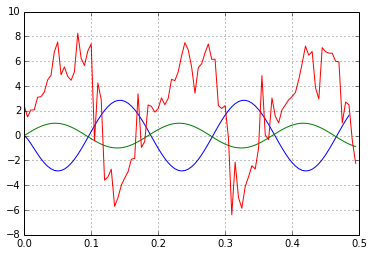

In [15]:
pl.plot(sys_id_data.t.T, sys_id_data.y.T)
pl.plot(t, u)
pl.plot(t, y[:,2].T)
pl.grid()